# <font color=#5779c1>Advanced Regression - Case study on Suprise Housing</font>

    
## <font color=#5779c1>Problem Statement</font>
    
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. 

##### <div class="alert alert-info">Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.</div>

 

The company wants to know:

 - Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for `ridge` and `lasso regression`.

## <font color=#5779c1>Business Goal</font>

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## <font color=#5779c1>Data Definition</font>

 

The details of the various variables are available at 
[Data Defnition](url_here)

## <font color=#5779c1> Methodology</font>
 - Using the Exploratory Data analysis method to find the insights from the available data.
 - Find correlation and check for Multicollinearity and clean
 - model building
 - Build advance regression using ridge and lasso regression and compare the outcome
 
## <font color=#5779c1> This case study mainly divided in to 4 phases : </font>
1. Data understanding and exploration
2. Data Visualisation
3. Data preparation
4. Model building and evaluation
5. Ridge and Lasso Regression

### <font color=#5779c1> 1. Data understanding, cleaning and exploration </font>

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [489]:
# reading the house sales in Australia dataset
house = pd.read_csv("train.csv")

#### <font color=#5ebbff>Data Exploration</font>

In [490]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [491]:
house.shape

(1460, 81)

In [492]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [493]:
#Fetch for null values columns
nans_indices = house.columns[house.isna().any()].tolist()
nans_indices

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [494]:
# Checking the percentage of missing values
round(100*(house[nans_indices].isnull().sum()/len(house.index)), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [495]:
house.describe()      #other atributes of the dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### <font color=#5ebbff>Null value treatment from data description shared by customer to add meaningful insights to data </font>

In [496]:
house['Alley'].fillna('No Alley Access', inplace=True)
house['MasVnrType'].fillna('None', inplace=True) 
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True)
house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].fillna(0, inplace=True) 
house['LotFrontage'].fillna(0, inplace=True) 
house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 
house['BsmtQual'].fillna('No Basement', inplace=True) 
house['BsmtCond'].fillna('No Basement', inplace=True) 
house['BsmtExposure'].fillna('No Basement', inplace=True) 
house['BsmtFinType1'].fillna('No Basement', inplace=True) 
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house['GarageYrBlt'].fillna(2023, inplace=True)

In [497]:
#converting year to number of years
house.eval("YearBuilt = 2023 - YearBuilt", inplace=True)
house.eval("YearRemodAdd = 2023 - YearRemodAdd", inplace=True)
house.eval("GarageYrBlt = 2023 - GarageYrBlt", inplace=True)
house.eval("YrSold = 2023 - YrSold", inplace=True)

In [498]:
#converting from int type to object to treat the variables as categorical variables from data description file shared by customer
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [499]:
house.shape

(1460, 81)

In [500]:
# Checking the percentage of missing values
round(100*(house[nans_indices].isnull().sum()/len(house.index)), 2)

LotFrontage      0.00
Alley            0.00
MasVnrType       0.00
MasVnrArea       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinType2     0.00
Electrical       0.07
FireplaceQu      0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageQual       0.00
GarageCond       0.00
PoolQC           0.00
Fence            0.00
MiscFeature     96.30
dtype: float64

In [501]:
index_electrical = house[house['Electrical'].isnull()].index
house.drop(index_electrical , inplace=True)

In [502]:
# MiscFeature column has almost 96.3% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

#### <font color=#5ebbff>Checking percentile to determine outliers from house data </font>

In [503]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,20,20,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,15,208500
1,2,80.0,9600,47,47,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,16,181500
2,3,68.0,11250,22,21,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,15,223500
3,4,60.0,9550,108,53,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,17,140000
4,5,84.0,14260,23,23,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,15,250000


In [504]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   YearBuilt      1459 non-null   int64  
 4   YearRemodAdd   1459 non-null   int64  
 5   MasVnrArea     1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   int64  
 7   BsmtFinSF2     1459 non-null   int64  
 8   BsmtUnfSF      1459 non-null   int64  
 9   TotalBsmtSF    1459 non-null   int64  
 10  1stFlrSF       1459 non-null   int64  
 11  2ndFlrSF       1459 non-null   int64  
 12  LowQualFinSF   1459 non-null   int64  
 13  GrLivArea      1459 non-null   int64  
 14  GarageYrBlt    1459 non-null   float64
 15  GarageArea     1459 non-null   int64  
 16  WoodDeckSF     1459 non-null   int64  
 17  OpenPorchSF    1459 non-null   int64  
 18  Enclosed

In [505]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop([ 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [506]:
# now checking columns
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   MasVnrArea     1459 non-null   float64
 4   BsmtFinSF1     1459 non-null   int64  
 5   BsmtFinSF2     1459 non-null   int64  
 6   BsmtUnfSF      1459 non-null   int64  
 7   TotalBsmtSF    1459 non-null   int64  
 8   1stFlrSF       1459 non-null   int64  
 9   2ndFlrSF       1459 non-null   int64  
 10  LowQualFinSF   1459 non-null   int64  
 11  GrLivArea      1459 non-null   int64  
 12  GarageArea     1459 non-null   int64  
 13  WoodDeckSF     1459 non-null   int64  
 14  OpenPorchSF    1459 non-null   int64  
 15  EnclosedPorch  1459 non-null   int64  
 16  3SsnPorch      1459 non-null   int64  
 17  ScreenPorch    1459 non-null   int64  
 18  PoolArea

In [507]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,57.612748,10517.363948,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,...,1515.546950,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,180930.394791
std,421.411181,34.673850,9984.666267,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,...,525.650927,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,79468.964025
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.500000,42.000000,7549.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,...,1129.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,730.000000,63.000000,9477.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1094.500000,79.000000,11603.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,...,1777.500000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1313.200000,92.000000,14388.400000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,...,2158.600000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.100000,104.000000,17402.300000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,1831.500000,1141.100000,...,2466.200000,850.200000,335.000000,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,326200.000000
99%,1445.420000,137.420000,37593.680000,791.360000,1572.420000,830.560000,1797.100000,2155.100000,2219.520000,1419.040000,...,3123.760000,1002.980000,505.520000,285.840000,261.100000,168.000000,268.100000,0.000000,700.000000,442629.620000


Now looking at the above percentile data we see the below variables have data that are not evenly spread:</br>
- PoolArea</br>
- EnclosedPorch</br>
- 3SsnPorch</br>
- ScreenPorch</br>
- MiscVal</br>
- SalePrice</br>
- MasVnrArea</br>

## <font color=#5779c1> Step 2: Visualising the Data</font>
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### <font color=#5ebbff>Visualising Numeric Variables for housing data </font>

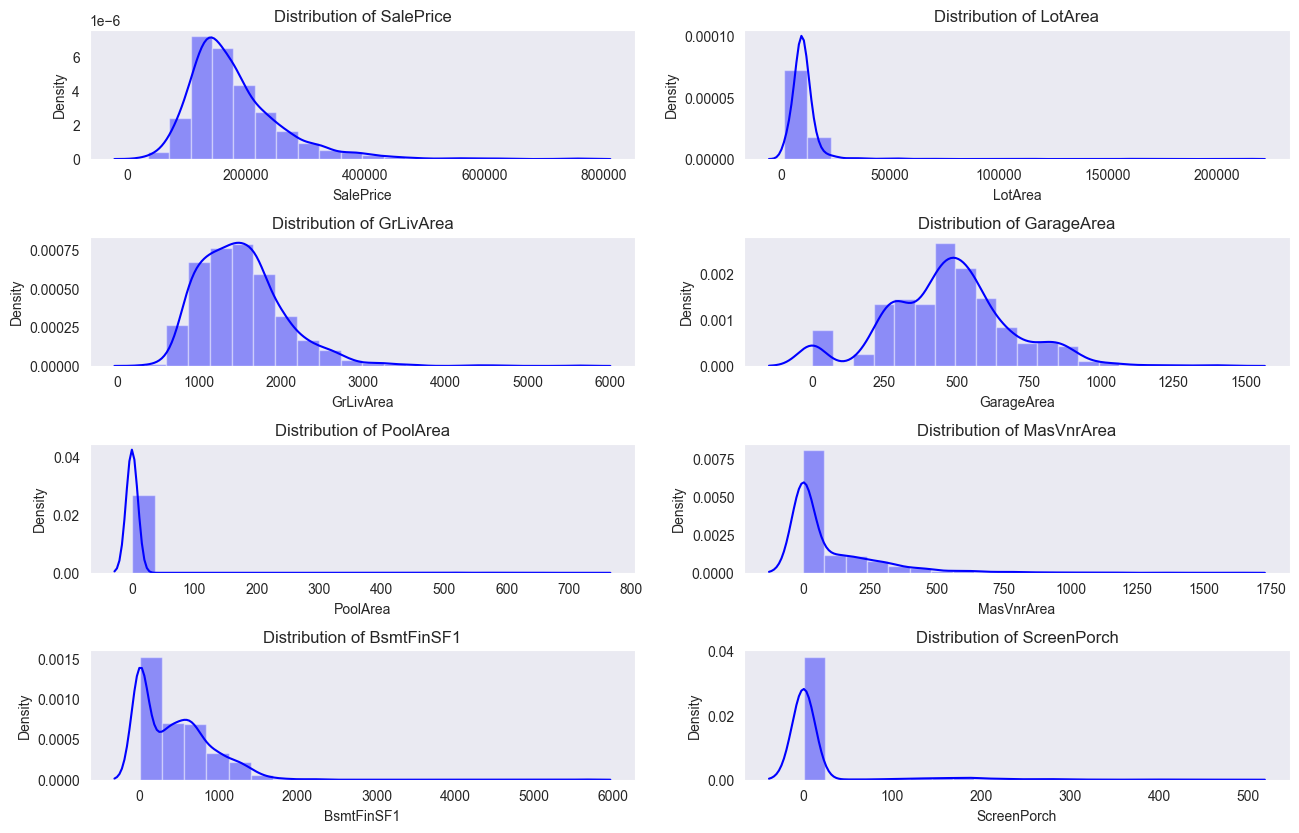

In [508]:
# Validating Continous variables for Outliers
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.set_palette("colorblind")
sns.set_style("dark")
sns.distplot(house.SalePrice, bins=20, color="blue")
plt.title("Distribution of SalePrice", fontsize=12)
plt.subplot(4,2,2)
sns.set_style("dark")
sns.distplot(house.LotArea, bins=20, color="blue")
plt.title("Distribution of LotArea", fontsize=12)
plt.subplot(4,2,3)
sns.set_style("dark")
sns.distplot(house['GrLivArea'], bins=20, color="blue")
plt.title("Distribution of GrLivArea", fontsize=12)
plt.subplot(4,2,4)
sns.set_style("dark")
sns.distplot(house.GarageArea, bins=20, color="blue")
plt.title("Distribution of GarageArea", fontsize=12)
plt.subplot(4,2,5)
sns.set_style("dark")
sns.distplot(house.PoolArea, bins=20, color="blue")
plt.title("Distribution of PoolArea", fontsize=12)
plt.subplot(4,2,6)
sns.set_style("dark")
sns.distplot(house.MasVnrArea, bins=20, color="blue")
plt.title("Distribution of MasVnrArea", fontsize=12)
plt.subplot(4,2,7)
sns.set_style("dark")
sns.distplot(house.BsmtFinSF1, bins=20, color="blue")
plt.title("Distribution of BsmtFinSF1", fontsize=12)
plt.subplot(4,2,8)
sns.set_style("dark")
sns.distplot(house.ScreenPorch, bins=20, color="blue")
plt.title("Distribution of ScreenPorch", fontsize=12)
plt.subplots_adjust(left=0.2,bottom=0.5,right=1,top=1,wspace=0.2, hspace=0.6)
plt.show()

#### <font color=#5ebbff>Checking the Correlation between the variables</font>

In [509]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.020248,-0.033170,-0.050515,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,...,0.008524,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,-0.021756
LotFrontage,-0.020248,1.000000,0.100770,0.105202,0.076996,-0.009225,0.160976,0.238950,0.245613,0.042354,...,0.220436,0.201599,-0.016795,0.069836,0.027478,0.023536,0.023053,0.114135,-0.059583,0.209692
LotArea,-0.033170,0.100770,1.000000,0.103302,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,...,0.263109,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.263837
MasVnrArea,-0.050515,0.105202,0.103302,1.000000,0.260989,-0.071453,0.113719,0.359798,0.339605,0.174109,...,0.388012,0.370807,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.029550,0.472606
BsmtFinSF1,-0.004001,0.076996,0.214121,0.260989,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,...,0.208088,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,0.386436
BsmtFinSF2,-0.005668,-0.009225,0.111158,-0.071453,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,...,-0.009686,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.011412
BsmtUnfSF,-0.007508,0.160976,-0.002641,0.113719,-0.495718,-0.209395,1.000000,0.415283,0.317827,0.004661,...,0.240210,0.183224,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.214446
TotalBsmtSF,-0.013815,0.238950,0.260962,0.359798,0.521963,0.104593,0.415283,1.000000,0.819393,-0.173973,...,0.455001,0.486719,0.232255,0.246764,-0.095938,0.037292,0.084275,0.126083,-0.018586,0.613905
1stFlrSF,0.011627,0.245613,0.299533,0.339605,0.445473,0.096948,0.317827,0.819393,1.000000,-0.202268,...,0.566084,0.489741,0.235582,0.211278,-0.065580,0.056042,0.088598,0.131526,-0.021167,0.605968
2ndFlrSF,0.004885,0.042354,0.051030,0.174109,-0.136697,-0.099146,0.004661,-0.173973,-0.202268,1.000000,...,0.687726,0.138531,0.092159,0.208418,0.062166,-0.024308,0.040738,0.081531,0.016240,0.319464


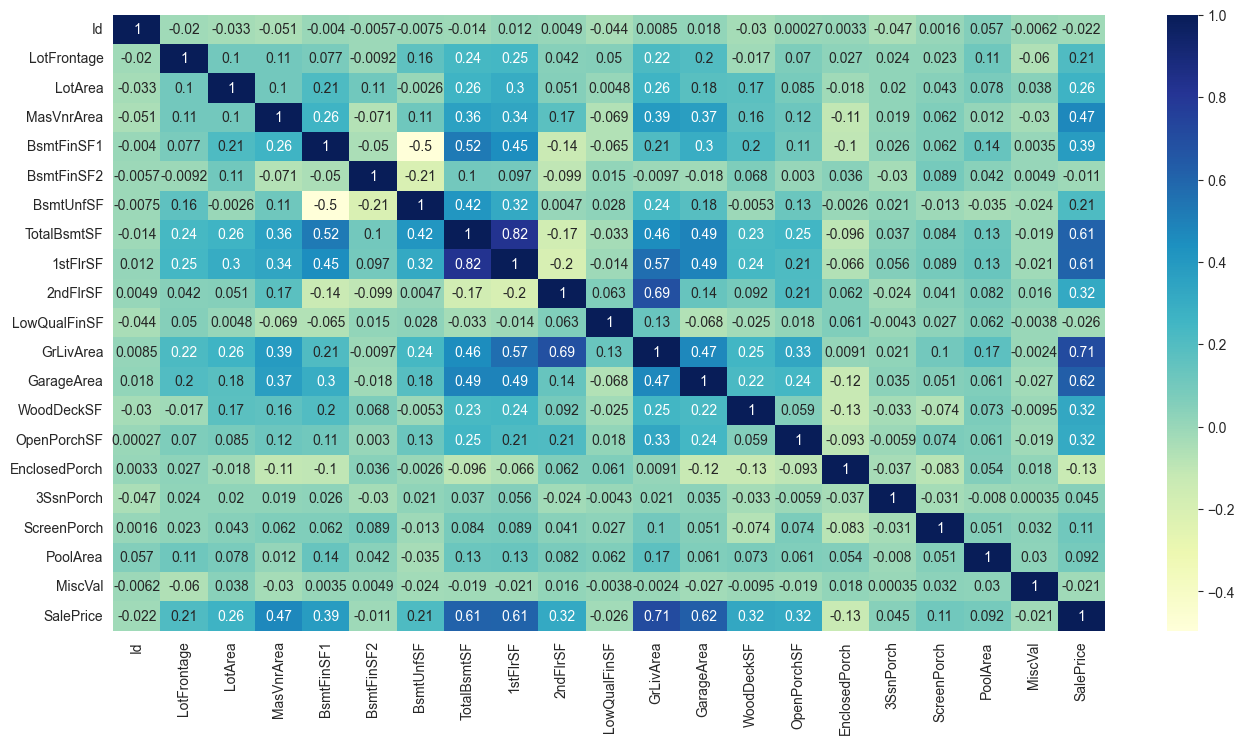

In [510]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

##### <font color=#5ebbff>Summarization:</font>
The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- GrLivArea  (Above grade (ground) living area square feet), GarageArea (Size of garage in square feet),1stFlrSF (First Floor square feet), 2ndFlrSF (Second floor square feet), MasVnrArea, BsmtFinSF1, WoodDeckSF, OpenPorchSF  are highly (positively) correlated


Correlation among independent variables:</br>
Many independent variables are highly correlated : 
- 1stFlrSF, TotalBsmtSF,
- GrLivArea, 2ndFlrSF 
are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).


#### <font color=#5ebbff>Visualizing/Understanding Categorical Data</font>

In [511]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical=house.select_dtypes(exclude=['float64','datetime64','int64'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [512]:
#MSSubClass: Identifies the type of dwelling involved in the sale.
house_categorical['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

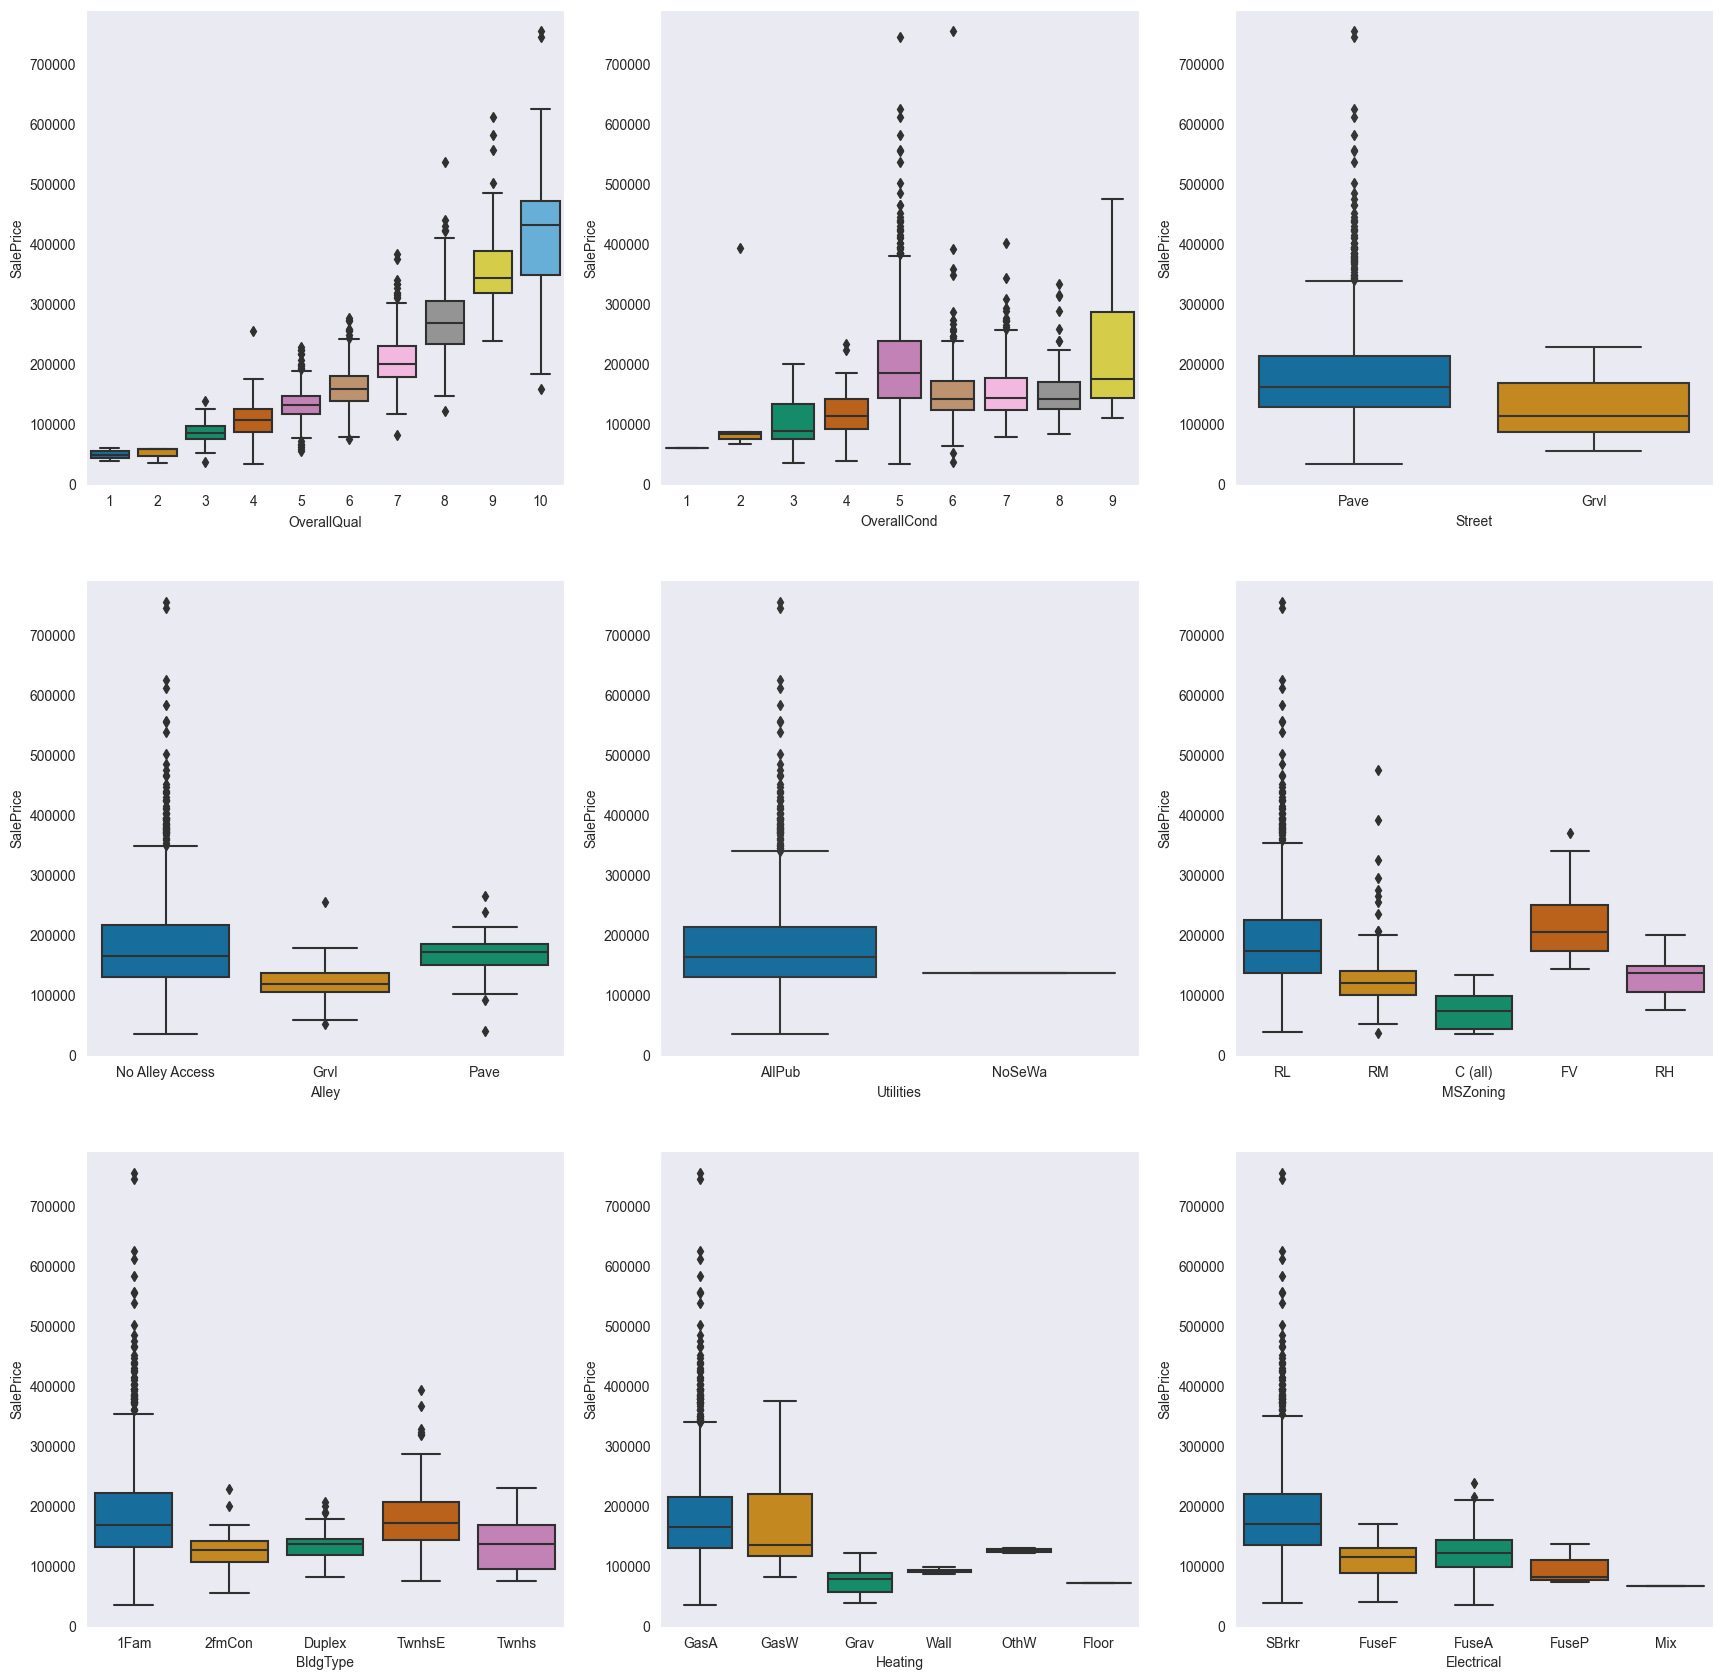

In [513]:
# Some of the categorical values are listed in graph below
# Making boxplot to compare the relation between the SalePrice and the categorical values
plt.figure(figsize=(21, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house)
plt.subplot(3,3,2)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house)
plt.subplot(3,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)
plt.subplot(3,3,4)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house)
plt.subplot(3,3,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
plt.subplot(3,3,6)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(3,3,7)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
plt.subplot(3,3,8)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)
plt.subplot(3,3,9)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
plt.show()

##### <font color=#5ebbff>Summarization:</font>
- We see there is possitive growth in price based on OverallQuality
- Type of dwelling, Heating, etc

## <font color=#5779c1>3. Data Preparation</font>

Let's now prepare the data and build the model.

<font color=#5779c1> Dummy Variables</font>

In [514]:
# Defining the map function
def binary_street_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
house[['Street']] = house[['Street']].apply(binary_street_map)

# Defining the map function
def binary_utilities_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
house[['Utilities']] = house[['Utilities']].apply(binary_utilities_map)

# Defining the map function
def binary_centralair_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
house[['CentralAir']] = house[['CentralAir']].apply(binary_centralair_map)

In [515]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical=house.select_dtypes(exclude=['float64','datetime64','int64'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley Access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley Access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley Access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley Access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley Access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [516]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [517]:
# drop categorical variables 
house = house.drop(list(house_categorical.columns), axis=1)

In [518]:
# concat dummy variables with X
house = pd.concat([house, house_dummies], axis=1)

In [519]:
house.shape

(1459, 314)

In [520]:
house.head()

,Id,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,1,1,20,20,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1,1,47,47,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,1,1,22,21,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,1,1,108,53,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,1,1,23,23,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [521]:
# split into X and y
y = house.pop('SalePrice')
X = house.drop(['Id'], axis=1)

In [522]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [523]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [524]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-2457321.404230257
[ 2.47705625e+01  5.40839247e-01  2.59689517e+04  3.96351802e+04
 -2.98129767e+02 -9.99056253e+01  1.90859264e+01  1.47413647e+01
  1.11219437e+01 -5.76489568e+00  2.00969959e+01 -3.00273774e+02
  1.60522972e+01  2.68686445e+01 -1.09701823e+01  3.19515967e+01
  4.47773436e+01  2.52762882e+01  5.60344964e+00  1.10102236e+01
  1.84622140e+01  6.18911746e+01  2.66391348e+01  4.46185803e+03
  1.13060617e+00 -5.12477318e+02  2.04732282e+01  7.75450287e+02
 -4.69195347e+03 -3.38358538e+04 -1.93043390e+03  5.24721870e+03
  5.66446544e+03 -6.26503935e+03 -5.63924916e+03 -1.48414106e+04
 -6.38696082e+03 -9.12000305e+03 -1.23483796e+04 -1.07594448e+04
 -6.49599015e+03  4.86353087e+04  4.00137589e+04  3.74346848e+04
  3.53986098e+04  1.17003893e+03 -5.03962055e+02  3.27955786e+03
  1.27936403e+04  1.19604061e+03  4.56817657e+03 -4.30911178e+02
  6.77539491e+03  6.63706893e+03 -9.71003089e+03 -3.34120442e+04
 -1.87388568e+03  5.16792247e+03 -1.62192805e+04  1.67435172e+04
  3.69

In [525]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+ str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+ str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+ str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+ str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+ str(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+ str(mse_test_lr))
metric.append(mse_test_lr**0.5)

r2_train_lr: 0.94969828433525
r2_test_lr: 0.6516832125010235
rss1_lr: 340948087677.91956
rss2_lr: 844360975812.6984
mse_train_lr: 333935443.3672082
mse_test_lr: 1927764784.9604986


## <font color=#5779c1>4. Model Building and Evaluation</font>

### <font color=#5779c1>Ridge and Lasso Regression</font>
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### <font color=#5779c1>Ridge Regression¶</font>

In [526]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [527]:
#checking the value of optimum number of parameters
print("best_params_:" +str(model_cv.best_params_))
print("best_score_: "+ str(model_cv.best_score_))

best_params_:{'alpha': 20}
best_score_: -18633.408358889323


In [528]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021541,0.001198,0.007579,0.001493,0.0001,{'alpha': 0.0001},-16925.770558,-21296.640101,-20205.983029,-20699.563340,...,-19739.530991,1517.229016,12,-11509.549886,-9903.157627,-10382.966954,-11577.411850,-10926.310473,-10859.879358,645.615935
1,0.024535,0.001740,0.009077,0.001425,0.001,{'alpha': 0.001},-16908.436939,-21274.185842,-20331.860755,-21671.293165,...,-19953.005756,1688.232842,25,-11511.507292,-9905.707847,-10432.075538,-11656.798233,-11022.163231,-10905.650428,658.637858
2,0.023736,0.003534,0.007778,0.001716,0.01,{'alpha': 0.01},-16842.242448,-21068.391163,-20302.947551,-22336.244923,...,-20023.496487,1835.585498,26,-11532.652452,-9937.270215,-10533.904505,-11752.719381,-11195.064065,-10990.322124,668.509744
3,0.020346,0.002999,0.006988,0.002194,0.05,{'alpha': 0.05},-17168.296765,-20529.831400,-19851.009970,-22070.354200,...,-19884.808993,1586.170476,24,-11691.601378,-10171.794812,-10676.574360,-11799.352641,-11414.610091,-11150.786656,627.060370
4,0.019747,0.002475,0.006383,0.001493,0.1,{'alpha': 0.1},-17594.474594,-20156.474559,-19592.896513,-21772.020602,...,-19846.956864,1342.673268,23,-11884.731115,-10528.529475,-10892.419643,-11835.580236,-11666.808996,-11361.613893,548.746329
5,0.021841,0.001354,0.007182,0.001323,0.2,{'alpha': 0.2},-18083.012512,-19901.825274,-19277.844952,-21391.879704,...,-19825.038398,1114.607616,19,-12189.931772,-11126.247762,-11210.756890,-11901.688692,-12030.480954,-11691.821214,437.754525
6,0.021143,0.002221,0.006582,0.001850,0.3,{'alpha': 0.3},-18337.947993,-19839.566908,-19109.530765,-21154.119797,...,-19819.641516,1018.051280,18,-12410.833434,-11579.994010,-11441.658800,-11964.868884,-12292.752863,-11938.021598,380.700896
7,0.020345,0.001850,0.008179,0.001323,0.4,{'alpha': 0.4},-18470.995374,-19862.775881,-19114.199965,-20974.098546,...,-19829.421027,945.556517,21,-12579.032434,-11906.040805,-11636.353762,-12025.694190,-12503.099843,-12130.044207,359.320926
8,0.018755,0.003060,0.006579,0.001748,0.5,{'alpha': 0.5},-18544.999020,-19898.549971,-19122.554142,-20826.883965,...,-19826.805281,892.202386,20,-12712.653784,-12163.081597,-11803.788551,-12082.012569,-12677.095594,-12287.726419,353.333270
9,0.019748,0.002780,0.006183,0.001163,0.6,{'alpha': 0.6},-18580.388283,-19918.520002,-19126.321212,-20723.368588,...,-19816.915356,858.204854,17,-12818.993730,-12372.408063,-11948.357543,-12132.068078,-12829.022374,-12420.169958,356.121200


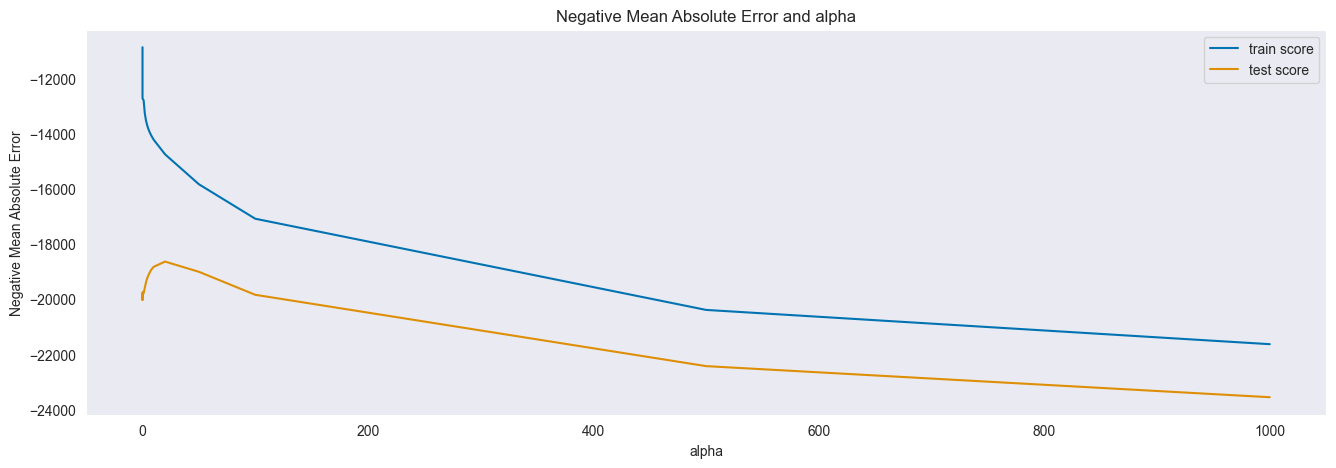

In [529]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**from the above graph and the bestparam score we got optimum lambda to be 20**

In [530]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.84259839e+00,  4.34980044e-01,  6.24370799e+03,  1.08042197e+03,
       -3.44701649e+02, -2.21793683e+02,  2.30684655e+01,  1.79677672e+00,
        9.11733572e+00, -2.81668333e+00,  8.09742930e+00,  4.74515732e+03,
        1.79292554e+01,  2.90859693e+01, -1.39793469e+01,  3.30358776e+01,
        2.94551632e+01,  8.13784945e+00,  1.34376207e+01,  1.93721987e+00,
        1.71067724e+01,  5.73346550e+01,  3.68745974e+01, -8.13905585e+01,
        5.64251795e-01, -2.74418518e+02,  8.15104122e+01, -2.08936136e+03,
        8.08383258e+02,  4.01975521e+03,  1.54482366e+02, -2.62779272e+03,
        4.40587152e+03, -1.53417245e+03, -9.47535986e+02, -6.37715101e+02,
       -2.08550688e+03, -4.56741309e+03, -8.03166803e+03, -1.40738686e+03,
       -2.87935732e+03,  6.25827460e+03,  1.06350457e+03,  4.66692709e+03,
       -1.22753486e+03,  9.57649007e+02,  8.72881582e+02,  1.57184171e+03,
       -7.42736061e+03,  3.22720467e+02,  8.09396854e+03,  3.23298026e+03,
        8.70995778e+03,  

In [531]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print("Using Ridge Regression: R-squared value of test and train data: "+str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

Using Ridge Regression: R-squared value of test and train data: 0.8971924806362304


In [532]:
#lets predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print("Using Ridge Regression: R-squared value of test and train data: "+str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Using Ridge Regression: R-squared value of test and train data: 0.8690190674414604


In [533]:
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 724916048.6942668


In [546]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8971924806362304
0.8690190674414604
696835618085.1196
317513229328.08887
682503053.952125
724916048.6942668


### <font color=#5779c1>Lasso Regression </font>

In [534]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [535]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.294611,0.055185,0.006782,0.001323,0.0001,{'alpha': 0.0001},-16767.942987,-20832.686286,-19985.303321,-21880.407208,...,-19820.226005,1711.577692,27,-11515.621442,-9903.810102,-10495.393979,-11677.280926,-11098.697268,-10938.160744,659.007608
1,0.297406,0.065964,0.005186,0.000747,0.001,{'alpha': 0.001},-16767.603700,-20830.168743,-19984.766553,-21880.000385,...,-19818.732432,1711.372562,26,-11515.631600,-9903.809038,-10495.389838,-11677.307378,-11098.684256,-10938.164422,659.015578
2,0.312563,0.042136,0.005787,0.001464,0.01,{'alpha': 0.01},-16764.097192,-20804.993525,-19980.459813,-21875.380949,...,-19810.228883,1708.576511,25,-11515.820537,-9903.911941,-10495.496279,-11677.724838,-11098.732014,-10938.337122,659.098062
3,0.286834,0.058212,0.004786,0.000399,0.05,{'alpha': 0.05},-16749.177714,-20713.451913,-19976.044845,-21854.928360,...,-19781.074004,1698.780386,24,-11516.859541,-9904.547841,-10496.679859,-11679.589488,-11099.428115,-10939.420969,659.373810
4,0.298802,0.065814,0.006582,0.001353,0.1,{'alpha': 0.1},-16729.486394,-20653.166914,-19929.570859,-21840.340117,...,-19748.378399,1695.097806,23,-11518.385266,-9905.278776,-10498.435578,-11681.887339,-11100.613958,-10940.920183,659.749361
5,0.224400,0.020564,0.005784,0.002130,0.2,{'alpha': 0.2},-16691.341450,-20599.438783,-19838.417222,-21812.226796,...,-19694.936771,1695.249358,22,-11520.110619,-9906.898287,-10502.415537,-11686.085626,-11103.241992,-10943.750412,660.080150
6,0.224201,0.014541,0.005985,0.001995,0.3,{'alpha': 0.3},-16651.601655,-20549.240189,-19795.655342,-21786.680585,...,-19652.843306,1697.890010,21,-11521.994838,-9908.739749,-10506.575889,-11690.884718,-11106.004887,-10946.840016,660.488260
7,0.219207,0.013163,0.004587,0.000798,0.4,{'alpha': 0.4},-16615.359364,-20497.488833,-19755.958273,-21765.021699,...,-19613.219035,1700.145200,19,-11523.775184,-9910.673985,-10510.406108,-11695.172884,-11109.214942,-10949.848620,660.801215
8,0.210046,0.019858,0.005785,0.001333,0.5,{'alpha': 0.5},-16578.214909,-20455.331102,-19717.834917,-21750.507070,...,-19577.073951,1705.613924,18,-11526.343473,-9912.270005,-10514.571908,-11700.055487,-11112.933035,-10953.234782,661.472759
9,0.227990,0.015663,0.004588,0.000489,0.6,{'alpha': 0.6},-16560.986814,-20424.012533,-19675.779906,-21738.447678,...,-19546.801298,1705.842328,17,-11529.179944,-9914.466879,-10518.332762,-11704.778328,-11117.306738,-10956.812930,662.052059


In [536]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [537]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.262148,0.059736,0.005175,0.001177,0.0001,{'alpha': 0.0001},0.904022,0.751000,0.746058,0.315708,...,0.717703,0.210690,14,0.944837,0.968334,0.963251,0.951238,0.954246,0.956381,0.008419
1,0.262734,0.056865,0.004982,0.000011,0.001,{'alpha': 0.001},0.904033,0.751039,0.746080,0.315815,...,0.717744,0.210656,13,0.944837,0.968334,0.963251,0.951238,0.954246,0.956381,0.008419
2,0.268888,0.053379,0.006191,0.001608,0.01,{'alpha': 0.01},0.904140,0.751422,0.746285,0.316914,...,0.718112,0.210280,11,0.944836,0.968334,0.963250,0.951236,0.954245,0.956380,0.008419
3,0.293712,0.059393,0.006383,0.000799,0.05,{'alpha': 0.05},0.904622,0.752998,0.746873,0.321752,...,0.719641,0.208609,7,0.944835,0.968334,0.963247,0.951230,0.954241,0.956377,0.008420
4,0.256712,0.039952,0.004595,0.000480,0.1,{'alpha': 0.1},0.905227,0.754480,0.747468,0.320433,...,0.719973,0.209327,4,0.944833,0.968334,0.963242,0.951221,0.954235,0.956373,0.008421
5,0.243947,0.014948,0.006184,0.001716,0.2,{'alpha': 0.2},0.906441,0.756063,0.748329,0.316146,...,0.719956,0.211333,5,0.944829,0.968332,0.963232,0.951203,0.954223,0.956364,0.008423
6,0.235771,0.018024,0.005985,0.001545,0.3,{'alpha': 0.3},0.907636,0.757225,0.748916,0.312180,...,0.719861,0.213195,6,0.944824,0.968330,0.963221,0.951183,0.954210,0.956354,0.008425
7,0.225598,0.031288,0.005186,0.000745,0.4,{'alpha': 0.4},0.908769,0.758242,0.749447,0.307452,...,0.719552,0.215327,8,0.944819,0.968328,0.963209,0.951163,0.954194,0.956343,0.008426
8,0.211840,0.018307,0.005186,0.001163,0.5,{'alpha': 0.5},0.909938,0.758759,0.749960,0.302331,...,0.719066,0.217596,9,0.944814,0.968324,0.963196,0.951141,0.954178,0.956331,0.008428
9,0.247748,0.043291,0.006192,0.001587,0.6,{'alpha': 0.6},0.910095,0.759051,0.750491,0.297026,...,0.718297,0.219751,10,0.944808,0.968320,0.963182,0.951119,0.954160,0.956318,0.008430


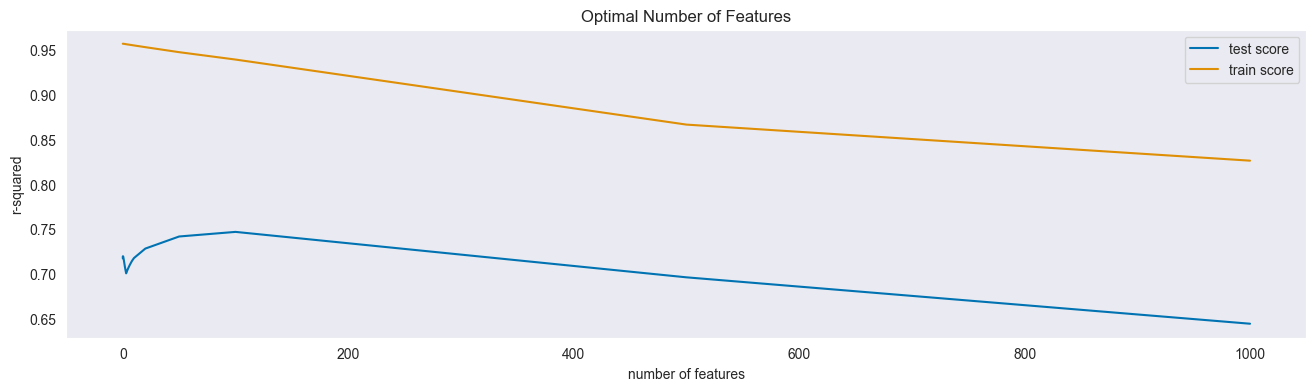

In [538]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [539]:
#checking the value of optimum number of parameters
print("Using Lasso: best_params_: "+ str(model_cv.best_params_))
print("Using Lasso: best_score_:"+ str(model_cv.best_score_))

Using Lasso: best_params_: {'alpha': 100}
Using Lasso: best_score_:-17012.92249690341


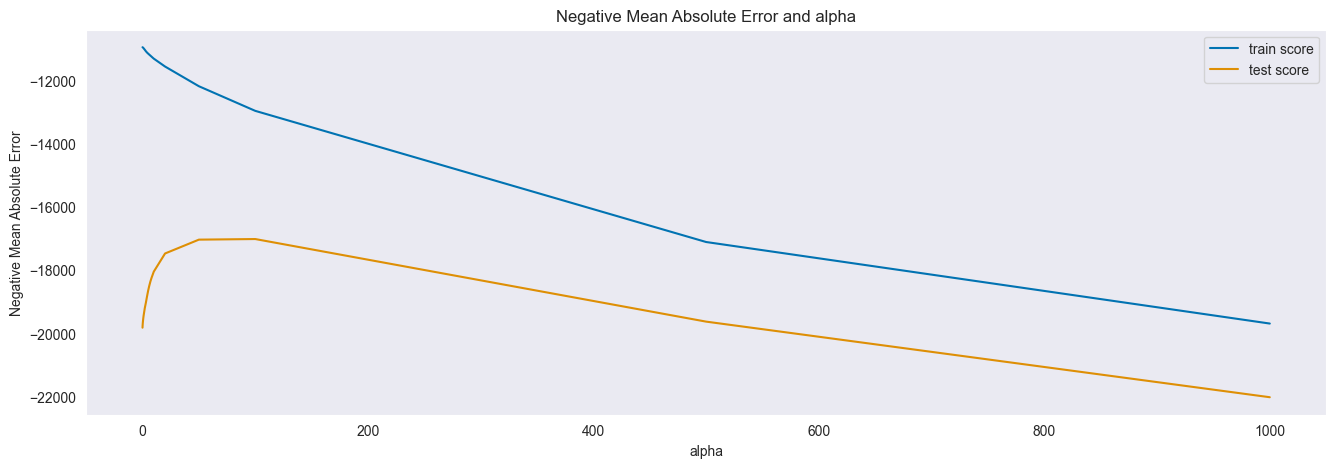

In [540]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**from the above graph and the bestparam score we got optimum lambda to be 100**

In [541]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [542]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9318897281934095


In [543]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [544]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6874608533266893


In [545]:
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 1729752864.3524911


In [547]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9318897281934095
0.6874608533266893
461655564165.05524
757631754586.3911
452160199.965774
1729752864.3524911


In [548]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.496983e-01,8.971925e-01,9.318897e-01
1,R2 Score (Test),6.516832e-01,8.690191e-01,6.874609e-01
2,RSS (Train),3.409481e+11,6.968356e+11,4.616556e+11
3,RSS (Test),8.443610e+11,3.175132e+11,7.576318e+11
4,MSE (Train),1.827390e+04,2.612476e+04,2.126406e+04
5,MSE (Test),4.390632e+04,2.692427e+04,4.159030e+04


## Lets observe the changes in the coefficients after regularization

In [550]:
betas = pd.DataFrame(index=X.columns)

In [551]:
betas.rows = X.columns

In [552]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [557]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,24.770562,-8.842598,16.564911
LotArea,0.540839,0.434980,0.400489
Street,25968.951681,6243.707990,11833.187246
Utilities,39635.180170,1080.421966,0.000000
YearBuilt,-298.129767,-344.701649,-349.391081
YearRemodAdd,-99.905625,-221.793683,-199.836963
MasVnrArea,19.085926,23.068465,18.186961
BsmtFinSF1,14.741365,1.796777,24.505476
BsmtFinSF2,11.121944,9.117336,24.813451
BsmtUnfSF,-5.764896,-2.816683,9.474120
